![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Importación de librerías
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
bikes.groupby('workingday').total.count()

workingday
0    3474
1    7412
Name: total, dtype: int64

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
bikes.groupby('hour').total.count()

hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: total, dtype: int64

## Punto 1 -  Análisis de resultados

Como es posible observar en las celdas anteriores los resultados biclase de promedios de rentas entre días "laborales" y "no laborales" están balanceadas. El promedio de usuarios registrados en días "hábiles" o "no", están homogeneamente distribuidos por lo cual no sería esa una buena única ramificación inicial por su alta impureza. 

No obstante al contarlos, la métrica indica que la mayoría de los registros son obviamente los días laborales (desbalance). Así mismo la correlación con variables como temperatura, humedad o velocidad del viento pueden sesgar el análisis.

Por otro lado la clasificación por hora del día si muestra una tendencia a pocos usuarios durante las horas de la madrugada y picos en las horas del horario laboral con decenso incremental hacia las horas de la noche. siendo las horas de mayor uso los periodos de término de la jornada entre 17 y 18 horas. 

Por otro lado es importante observar que pareciera que durante las horas de la mañana entre 1 y 10 am algunos registros (51 en total) han sido removidos, quizá artificialmente. 


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

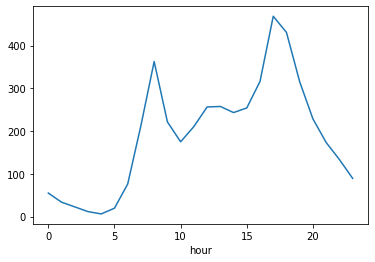

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour', ylabel='total'>

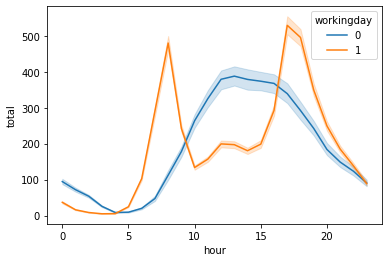

In [9]:
# Celda 2.2 y celda 2.3 - "workingday"=0 escriba su código y hallazgos 
sns.lineplot(data=bikes, x='hour', y='total',  hue='workingday')

## Punto 2 -  Análisis de resultados

Como podemos ver, en la gráfica podemos condensar ambos resultados requeridos para las celdas 2.2 y 2.3 (con líneas que sumadas, nos entregarían la gráfica de la Celda 2.1) y es posible observar que la distribución de las rentas en promedio se comportan con gradientes decrecientes entre las 0000 y las 0500 para ambos tipos de jornada (laboral o no laboral). Horarios en los que posteriormente y de manera diferencial adquieren un gradiente positivo pronunciado con picos seaprados por gradientes decrecientes y crecientes a las 0700-0800 y 1600-1700 para los días laborales y con picos sostenidos entre las 1100 y las 1700 para los no laborales. Claramente definible para los días laborales en los horarios de ingreso y salida laboral y en dias no laborales con pico en los horarios vespertinos decrecientes hasta el fin del día, en los que los usuarios mayormente aprovechan sus días de descanso.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [224]:
# Celda 3
from sklearn.model_selection import cross_val_predict
y_total = bikes.iloc[:,bikes.columns=='total']
x_total = bikes.iloc[:,[2,-1]]


In [225]:
n_componentes_elegidas = 10

LR = LinearRegression().fit(x_total, y_total)

prediccion_LR = cross_val_predict(LR, x_total, y_total, method='predict')
MSE_LR = np.average(np.square(prediccion_LR - y_total))
print('MSE regresión lineal ordinario:')
print(MSE_LR)

MSE regresión lineal ordinario:
30359.62136639098


In [226]:
PCA = LinearRegression()
PCA.fit(x_total, y_total)

prediccion_PCA = cross_val_predict(PCA, x_total, y_total, method='predict')
MSE_PCA = np.average(np.square(prediccion_PCA - y_total))
print('MSE regresión por componentes principales:')
print(MSE_PCA)

MSE regresión por componentes principales:
30359.62136639098


In [227]:
PLS = PLSRegression(n_components=2)
PLS.fit(x_total, y_total)

prediccion_PLS = cross_val_predict(PLS, x_total, y_total, method='predict')
MSE_PLS = np.average(np.square(prediccion_PLS - y_total))

print('MSE regresión por Minimos Cuadrados Parciales:')
print(MSE_PLS)

MSE regresión por Minimos Cuadrados Parciales:
30359.62136639099


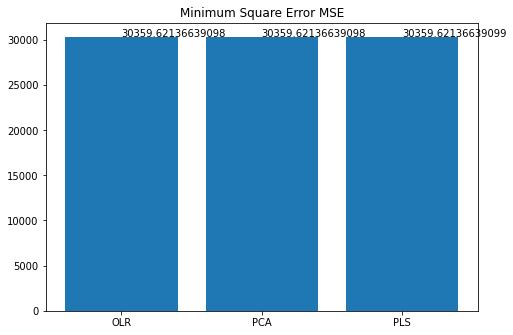

In [228]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Minimum Square Error MSE")
ejeX = ['OLR', 'PCA','PLS']
ejeY = [MSE_LR,MSE_PCA,MSE_PLS]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [235]:
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour
bikes.head()

x = bikes.columns.drop(['season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 
                        'windspeed', 'casual', 'registered', 'total'])
x_total = bikes[x]
x_total = x_total.reset_index(drop = True)

# Selección de la variable de interés
y_total = bikes.loc[:, bikes.columns == "total"]
y_total = y_total.reset_index(drop = True)
y_total = y_total['total'].astype(int)

In [236]:
# Celda 4


max_depth = None 
num_pct = 10 
max_features = None
min_gain = 0.001


In [237]:
def gini(x):
    
    x = np.asarray(x)
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    g = 0.5 * rmad
    
    return g

In [238]:
def gini_impurity(X_col, y, split):
    
    filter_l = X_col <= split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [239]:
def best_split(x_total, y_total, num_pct = 10):
    
    features = range(x_total.shape[1])
    
    best_split = [0, 0, 0] 

    for j in features:
        
        splits = np.percentile(x_total.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct + 1)).tolist())
        splits = np.unique(splits)[1:]
        
        for split in splits:
            gain = gini_impurity(x_total.iloc[:, j], y_total, split)
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [240]:
def tree_grow(x_total, y_total, level = 0, min_gain = 0.001, max_depth = None, num_pct = 10):
    
    if x_total.shape[0] == 1:
        tree = dict(y_pred = y_total.iloc[:1].values[0], y_prob = 0.5, level = level, split = -1, n_samples = 1,
                    gain = 0)
        return tree
    
    j, split, gain = best_split(x_total, y_total, num_pct)
    
    y_pred = int(y_total.mean() >= 0.5) 
    y_prob = (y_total.sum() + 1.0) / (y_total.shape[0] + 2.0) 
    
    tree = dict(y_pred = y_pred, y_prob = y_prob, level = level, split = -1, n_samples = x_total.shape[0], 
                gain = gain)
    
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    filter_l = x_total.iloc[:, j] < split
    X_l, y_l = x_total.loc[filter_l], y_total.loc[filter_l]
    X_r, y_r = x_total.loc[~filter_l], y_total.loc[~filter_l]
    tree['split'] = [j, split]

    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain = min_gain, max_depth = max_depth, num_pct = num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain = min_gain, max_depth = max_depth, num_pct = num_pct)
    
    return tree

In [241]:
tree_grow(x_total, y_total, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 6.0],
 'n_samples': 10886,
 'gain': 0.07110879901916922,
 'sl': {'y_pred': 1,
  'y_prob': 25.15934475055845,
  'level': 1,
  'split': -1,
  'n_samples': 2684,
  'gain': 0.06377444761696882},
 'sr': {'y_pred': 1,
  'y_prob': 245.96538274012676,
  'level': 1,
  'split': -1,
  'n_samples': 8202,
  'gain': 0.023724667107907715}}

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [244]:
# Celda 5
y_total = bikes.iloc[:,bikes.columns=='total']
x_total = bikes.iloc[:,[2,-1]]

max_depth_range = range(1, 23)
MSE_DTRApp = []
pd.DataFrame(MSE_DTRApp)

for depth in max_depth_range:
    dtr = DecisionTreeRegressor(
            criterion='friedman_mse', 
            splitter='best', 
            max_depth=depth, 
            random_state=0)    
    dtr.fit(x_total, y_total)
    
    
    prediccionDTR= cross_val_predict(dtr, x_total, y_total, method='predict')
    MSE_DTR = np.average(np.square(prediccionDTR - y_total.total))
    MSE_DTRApp.append(MSE_DTR)    

print('MSE regresión por Árbol de decisión:')
print(MSE_DTRApp)



MSE regresión por Árbol de decisión:
[25682.856410773486, 23413.139278781146, 21774.3973666331, 20646.472358503215, 17278.66635878625, 15407.785053636011, 15219.913929683144, 15212.142632270046, 15208.142261460005, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574, 15207.603837660574]


Text(0, 0.5, 'MSE por iteración')

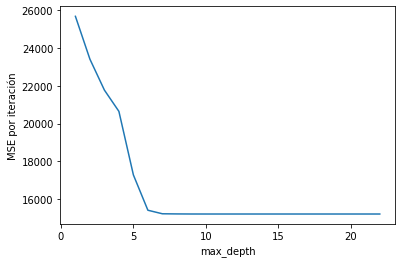

In [245]:
plt.plot(max_depth_range,MSE_DTRApp)
plt.xlabel('max_depth')
plt.ylabel('MSE por iteración')

## COMPARACIÓN

Comparando los coeficientes de desempeño de los modelos anteriores el Coeficiente de _workingDay_ será positivo mientras sea "día hábil" superando 6 ciclas rentadas por día.

El coeficiente _hour_ es positivo y directamente proporcional con la hora de la renta y la cantidad de ciclas rentadas. Lo anterior no es cierto en todos los casos.

En caso de que _workingday_=0,  el prnóstico no es fiable pues indica que no hay rentas lo cual no es cierto en la realidad. Así mismo


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [124]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,http://mashable.com/2013/08/03/twerking-addict...,523.0,10.0,660.0,0.493884,1.0,0.633971,20.0,4.0,1.0,...,0.050000,0.50,-0.258730,-0.80,-0.100000,0.1,0.0,0.4,0.0,0
5996,http://mashable.com/2014/08/21/study-programs-...,139.0,9.0,144.0,0.647887,1.0,0.739583,15.0,4.0,10.0,...,0.100000,0.60,-0.250000,-0.30,-0.200000,0.0,0.0,0.5,0.0,1
5997,http://mashable.com/2013/04/25/email-warrant-m...,623.0,8.0,536.0,0.512287,1.0,0.647929,6.0,2.0,1.0,...,0.100000,0.40,-0.156250,-0.30,-0.100000,0.0,0.0,0.5,0.0,0
5998,http://mashable.com/2013/06/03/smartphone-sale...,584.0,10.0,266.0,0.534413,1.0,0.605882,9.0,6.0,1.0,...,0.100000,0.60,-0.250000,-0.40,-0.100000,0.0,0.0,0.5,0.0,0


In [125]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [126]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

<AxesSubplot:>

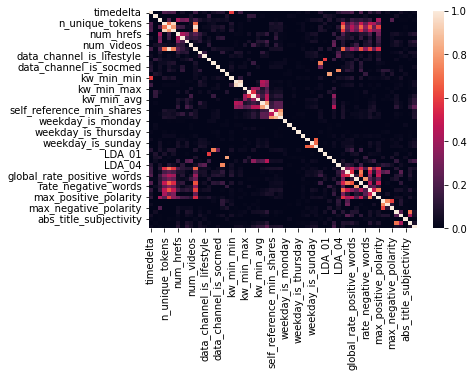

In [127]:
corr = df.dropna().corr()
sns.heatmap(corr, vmin=0, vmax=1)

In [128]:
max_depth_range = range(1, 21)
accuracy_scores = []
f1_scores = []

for depth in max_depth_range:
    dtr = DecisionTreeClassifier(
            max_depth=depth, 
            random_state=0)    
    accuracy_scores.append(cross_val_score(dtr, X, y, cv=10, scoring='accuracy').mean())
    f1_scores.append(cross_val_score(dtr, X, y, cv=10, scoring='f1').mean())


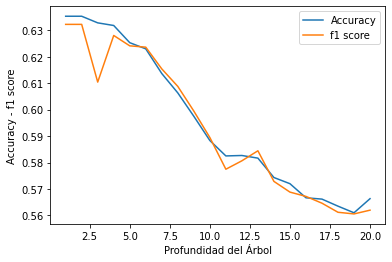

In [129]:
plt.plot(max_depth_range, accuracy_scores, max_depth_range, f1_scores)
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Accuracy - f1 score' )
plt.legend(['Accuracy','f1 score'])

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

## 100 Árboles de decisión sin Max Depth

In [136]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100).fit(X_train, y_train)

In [164]:
y_pred = clf.predict(X_test)
f1_scoreCLF1=[]
accuracy_scoresCLF1=[]

accuracy_scoresCLF1.append(cross_val_score(LR100, X_train, y_train, cv=10, scoring='accuracy').mean())
f1_scoreCLF1.append(cross_val_score(LR100, X_train, y_train, cv=10, scoring='f1').mean())
print(f1_scoreCLF1)
print(accuracy_scoresCLF1)

[0.6077969089464849]
[0.6177777777777778]


## 100 Árboles de decisión con max_depth=2

In [138]:
clf2 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier( max_depth=2), 
    n_estimators=100).fit(X_train, y_train)

In [163]:
y_pred = clf2.predict(X_test)
f1_scoreCLF2=[]
accuracy_scoresCLF2=[]

accuracy_scoresCLF2.append(cross_val_score(LR100, X_train, y_train, cv=10, scoring='accuracy').mean())
f1_scoreCLF2.append(cross_val_score(LR100, X_train, y_train, cv=10, scoring='f1').mean())
print(f1_scoreCLF2)
print(accuracy_scoresCLF2)

[0.6071505981909098]
[0.6173333333333333]


## 100 Regresiones Logísticas

In [149]:
from sklearn.linear_model import LinearRegression, LogisticRegression 
LR100 = BaggingClassifier(base_estimator=LogisticRegression(random_state=0), n_estimators=100).fit(X,y)
                          
                          

In [150]:
LR100.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=0),
                  n_estimators=100)

In [152]:
y_pred = LR100.predict(X_test)

array([1, 1, 1, ..., 1, 0, 0])

In [162]:
f1_score2=[]
accuracy_scores2=[]

accuracy_scores2.append(cross_val_score(LR100, X_train, y_train, cv=10, scoring='accuracy').mean())
f1_score2.append(cross_val_score(LR100, X_train, y_train, cv=10, scoring='f1').mean())
print(f1_score2)
print(accuracy_scores2)

[0.6068739733945898]
[0.6173333333333333]


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [161]:
# Celda 8
f1_score3=[]
accuracy_scores3=[]

VP = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

VP.fit(X_train, y_train)
y_pred = VP.predict(X_test)
accuracy_scores3.append(cross_val_score(VP, X_train, y_train, cv=10, scoring='accuracy').mean())
f1_score3.append(cross_val_score(VP, X_train, y_train, cv=10, scoring='f1').mean())
print(f1_score3)
print(accuracy_scores3)

[0.6330671428062598]
[0.6335555555555554]


In [167]:
F1= [f1_scoreCLF1, f1_scoreCLF2, f1_score2,f1_score3]
ACC=[accuracy_scoresCLF1,accuracy_scoresCLF2, accuracy_scores2,accuracy_scores3]

Text(0, 0.5, 'Accuracy')

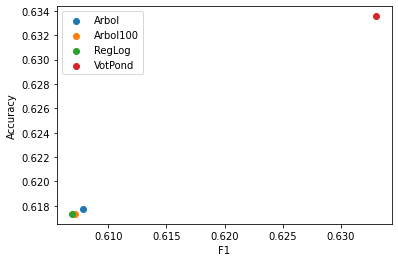

In [177]:
plt.scatter(F1[0],ACC[0])
plt.scatter(F1[1],ACC[1])
plt.scatter(F1[2],ACC[2])
plt.scatter(F1[3],ACC[3])
plt.legend(['Arbol','Arbol100','RegLog', "VotPond"])
plt.show
plt.xlabel('F1')
plt.ylabel('Accuracy')

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# CONCLUSIONES

Los resultados de los modelos de ensamble que combinan clasificadores, permite observar que el de mejor desempeño el modelo de **Votación Ponderada** con un _Acurracy_ = 0.633555 y un _F1_= 0.63306. Dado que este método a diferencia de **Votaciones Mayoritarias** prioriza con pesos a las iteraciones de mejor resultado dentro de las iteraciones realizadas.